<h1 style="font-size:36px;">Data exploration of INSPIRE, a publicly available research dataset for perioperative medicine</h1>

<h2 style="font-size:20px;">In this script data exploration and analysis of ""labs.csv" is shown</h2>

link: https://physionet.org/content/inspire/0.1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels
import ipywidgets as widgets
import ipympl
%matplotlib widget


print("Libraries Imported")


Libraries Imported


In [2]:
#test
"""
# Creating a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Creating a Pandas DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Creating a Matplotlib plot
plt.plot([1, 2, 3], [4, 5, 6])

# Creating a Seaborn plot
sns.scatterplot(data=df, x='A', y='B')

# Creating a TensorFlow constant
tensor = tf.constant([1, 2, 3])

# Creating a PyTorch tensor
tensor = torch.tensor([1, 2, 3])

# Using Keras layers
model = keras.Sequential()
"""

"\n# Creating a NumPy array\narr = np.array([1, 2, 3, 4, 5])\n\n# Creating a Pandas DataFrame\ndata = {'A': [1, 2, 3], 'B': [4, 5, 6]}\ndf = pd.DataFrame(data)\n\n# Creating a Matplotlib plot\nplt.plot([1, 2, 3], [4, 5, 6])\n\n# Creating a Seaborn plot\nsns.scatterplot(data=df, x='A', y='B')\n\n# Creating a TensorFlow constant\ntensor = tf.constant([1, 2, 3])\n\n# Creating a PyTorch tensor\ntensor = torch.tensor([1, 2, 3])\n\n# Using Keras layers\nmodel = keras.Sequential()\n"

In [3]:
df_labs = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\labs.csv')

In [4]:
df_labs.head(40)
    

,subject_id,chart_time,item_name,value
0,133338290,86155,total_protein,7.00
1,133338290,86155,sodium,141.00
2,133338290,86155,potassium,4.40
3,133338290,86155,platelet,151.00
4,133338290,93150,glucose,123.00
5,133338290,95585,platelet,133.00
6,133338290,97510,wbc,5.19
7,133338290,98450,wbc,6.83
8,199202301,74545,alt,36.00
9,199202301,74545,chloride,104.00


In [5]:
df_labs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21367131 entries, 0 to 21367130
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  int64  
 1   chart_time  int64  
 2   item_name   object 
 3   value       float64
dtypes: float64(1), int64(2), object(1)
memory usage: 652.1+ MB


In [6]:
df_labs.describe()

,subject_id,chart_time,value
count,2.136713e+07,2.136713e+07,2.136713e+07
mean,1.495922e+08,4.181668e+05,5.066397e+01
std,2.885131e+07,8.985931e+05,1.084213e+02
min,1.000008e+08,-2.591800e+05,-3.315000e+01
25%,1.244408e+08,3.635000e+03,3.800000e+00
50%,1.490870e+08,1.821500e+04,1.200000e+01
75%,1.746608e+08,2.850100e+05,7.800000e+01
max,1.999994e+08,7.457685e+06,1.134880e+05


In [7]:
df_labs.columns

Index(['subject_id', 'chart_time', 'item_name', 'value'], dtype='object')

In [8]:
def print_patient_labs(subject_id, df_labs):
    patient_labs = df_labs[df_labs['subject_id'] == subject_id]
    sorted_labs = patient_labs.sort_values(by='chart_time')
    print(f"Lab results for patient {subject_id}:")
    for index, row in sorted_labs.iterrows():
        time = row['chart_time']
        test = row['item_name']
        value = row['value']
        print(f"Time: {time}, Test: {test}, Value: {value}")

# Example usage:
print_patient_labs(133338290, df_labs)  # Replace 'df_labs' with your actual DataFrame variable name

Lab results for patient 133338290:
Time: -43955, Test: ptinr, Value: 1.33
Time: -43955, Test: rbc, Value: 4.55
Time: -43955, Test: wbc, Value: 6.38
Time: -43955, Test: chloride, Value: 101.0
Time: -43955, Test: potassium, Value: 4.2
Time: -43955, Test: sodium, Value: 138.0
Time: -43955, Test: creatinine, Value: 0.8
Time: -43955, Test: alt, Value: 22.0
Time: -43955, Test: ast, Value: 25.0
Time: -43955, Test: alp, Value: 76.0
Time: -43955, Test: total_bilirubin, Value: 0.7
Time: -43955, Test: hb, Value: 13.7
Time: -43955, Test: albumin, Value: 4.1
Time: -43955, Test: bun, Value: 23.0
Time: -43955, Test: phosphorus, Value: 3.4
Time: -43955, Test: calcium, Value: 9.3
Time: -43955, Test: platelet, Value: 134.0
Time: -43955, Test: lymphocyte, Value: 13.0
Time: -43955, Test: glucose, Value: 91.0
Time: -43955, Test: aptt, Value: 36.4
Time: -43955, Test: fibrinogen, Value: 309.0
Time: -43955, Test: total_protein, Value: 6.7
Time: -43955, Test: hct, Value: 41.8
Time: 1010, Test: glucose, Value: 

In [9]:
# Print the unique lab tests available in the dataset
unique_tests = df_labs['item_name'].unique()
print(f"Unique lab tests in the dataset: {unique_tests}")

# Descriptive statistics for each lab test
for test in unique_tests:
    print(f"\nStatistics for {test}:")
    print(df_labs[df_labs['item_name'] == test]['value'].describe())

# Check for missing values in the dataset
missing_values = df_labs.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")


Unique lab tests in the dataset: ['total_protein' 'sodium' 'potassium' 'platelet' 'glucose' 'wbc' 'alt'
 'chloride' 'phosphorus' 'albumin' 'hb' 'lymphocyte' 'calcium' 'bun'
 'total_bilirubin' 'alp' 'ast' 'creatinine' 'rbc' 'fibrinogen' 'ptinr'
 'aptt' 'crp' 'hct' 'ph' 'paco2' 'pao2' 'hco3' 'sao2' 'lacate' 'ckmb'
 'troponin_i' 'ck' 'hba1c' 'be' 'troponin_t' 'd_dimer']

Statistics for total_protein:
count    657604.000000
mean          6.314515
std           0.975800
min           0.100000
25%           5.700000
50%           6.400000
75%           7.100000
max          18.200000
Name: value, dtype: float64

Statistics for sodium:
count    1.002519e+06
mean     1.381016e+02
std      4.953793e+00
min      1.000000e+00
25%      1.360000e+02
50%      1.390000e+02
75%      1.410000e+02
max      2.000000e+02
Name: value, dtype: float64

Statistics for potassium:
count    1.005922e+06
mean     4.066849e+00
std      5.773179e-01
min      3.000000e-01
25%      3.700000e+00
50%      4.000000e+00


In [10]:
"""
lab_tests = df_labs['item_name'].unique()
for test in lab_tests:
    sns.histplot(df_labs[df_labs['item_name'] == test]['value'], kde=True)
    plt.title(f'Distribution of {test} values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
"""    

"\nlab_tests = df_labs['item_name'].unique()\nfor test in lab_tests:\n    sns.histplot(df_labs[df_labs['item_name'] == test]['value'], kde=True)\n    plt.title(f'Distribution of {test} values')\n    plt.xlabel('Value')\n    plt.ylabel('Frequency')\n    plt.show()\n"

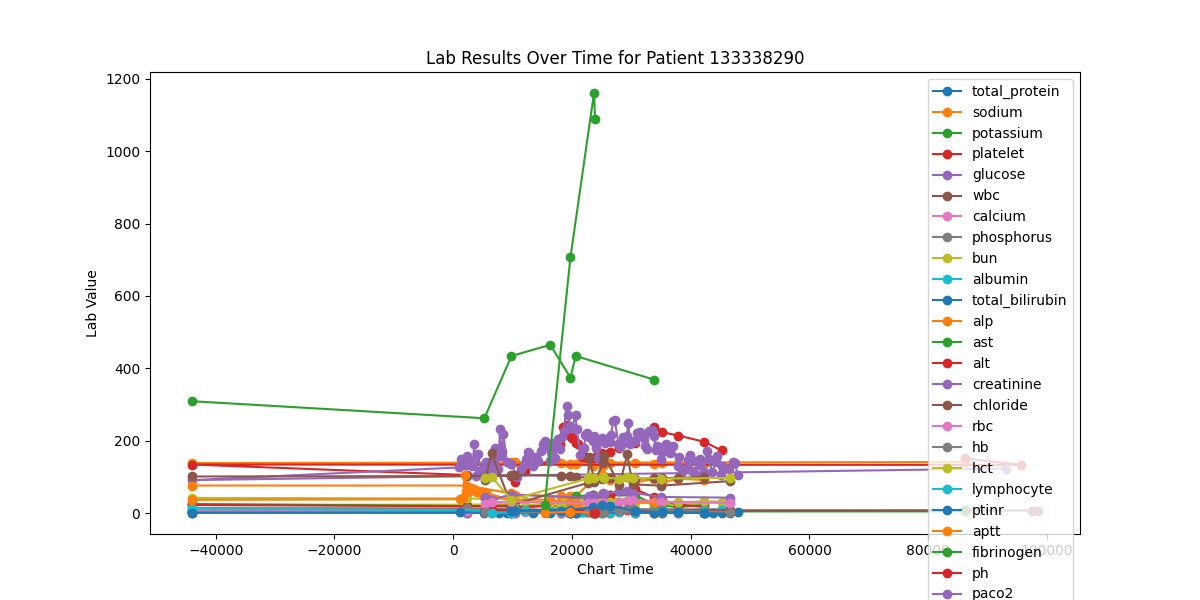

In [16]:
patient_labs = df_labs[df_labs['subject_id'] == 133338290]
lab_tests = patient_labs['item_name'].unique()
plt.figure(figsize=(12, 6))

for test in lab_tests:
    test_data = patient_labs[patient_labs['item_name'] == test]
    plt.plot(test_data['chart_time'], test_data['value'], marker='o', label=test)

plt.xlabel('Chart Time')
plt.ylabel('Lab Value')
plt.title(f'Lab Results Over Time for Patient {133338290}')
plt.legend()
plt.show()

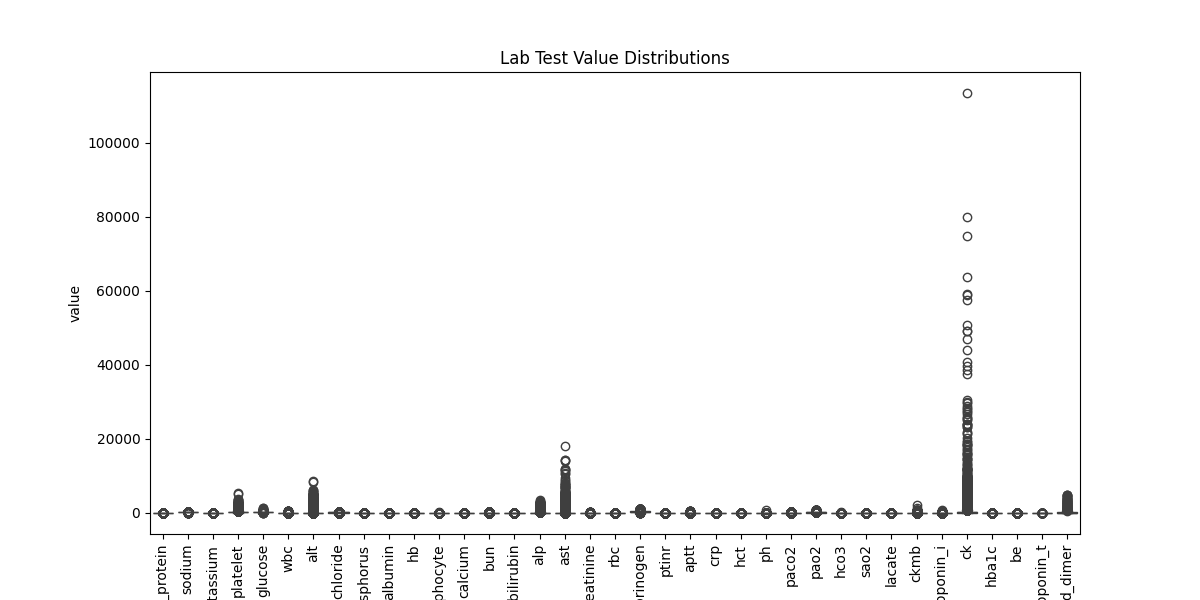

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='item_name', y='value', data=df_labs)
plt.xticks(rotation=90)
plt.title('Lab Test Value Distributions')
plt.show()

In [13]:
missing_data = df_labs.isnull().sum()
missing_percent = (missing_data / len(df_labs)) * 100
missing_df = pd.DataFrame({'count': missing_data, 'percentage': missing_percent})
print(missing_df)

            count  percentage
subject_id      0         0.0
chart_time      0         0.0
item_name       0         0.0
value           0         0.0


In [14]:
# thresholds should be a dictionary with lab item_name as keys and a tuple (low, high) as the range of normal values

thresholds = {
    'glucose': (70, 140),  # Replace with actual clinical standards
    'sodium': (135, 145),  # Replace with actual clinical standards
    # Add more tests and their ranges as needed
}


for test, (low, high) in thresholds.items():
    abnormal = df_labs[(df_labs['item_name'] == test) & ((df_labs['value'] < low) | (df_labs['value'] > high))]
    print(f"Abnormal values for {test}:")
    print(abnormal)

Abnormal values for glucose:
          subject_id  chart_time item_name  value
215        114166470     4274415   glucose  201.0
232        114166470     4274450   glucose  189.0
238        114166470     4275230   glucose  167.0
280        114166470     4276660   glucose  209.0
362        114166470     4279235   glucose  151.0
...              ...         ...       ...    ...
21365873   175262561     1577290   glucose  163.0
21365874   175262561     1577450   glucose  165.0
21365875   175262561     1577810   glucose  427.0
21365876   175262561     1578110   glucose  182.0
21366118   152963023        3725   glucose  149.0

[657005 rows x 4 columns]
Abnormal values for sodium:
          subject_id  chart_time item_name  value
88         113823093       58120    sodium  133.0
212        114166470     4274415    sodium  134.0
246        114166470     4275775    sodium  133.0
329        114166470     4278635    sodium  131.0
418        114166470     4283010    sodium  134.0
...             

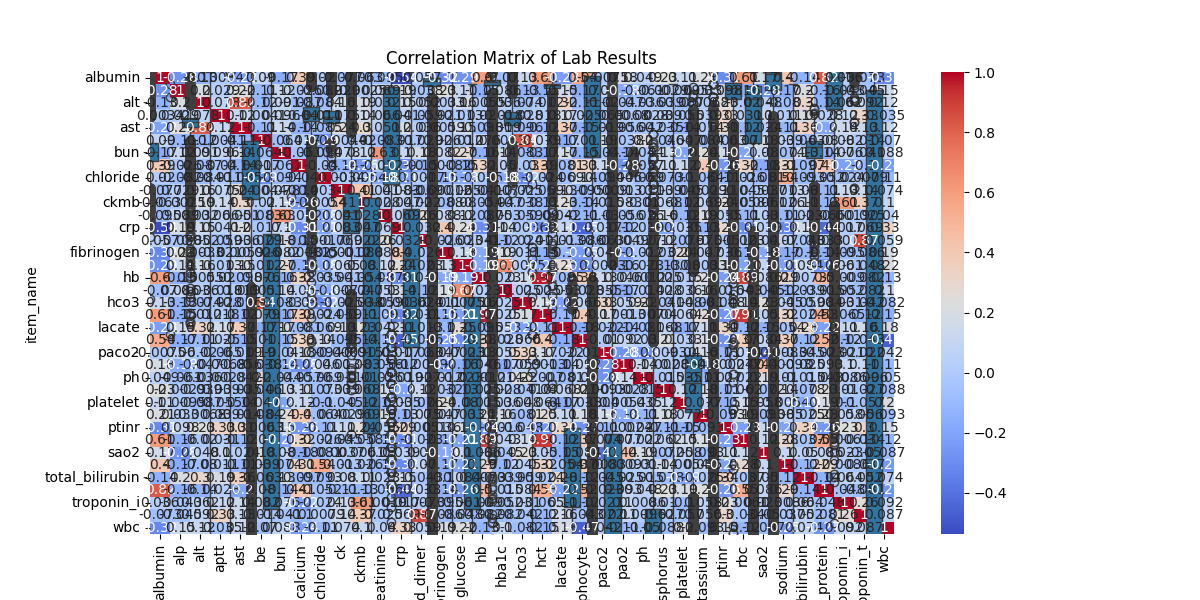

In [18]:
# Pivot the dataframe to have one row per subject_id and lab tests as columns
lab_pivot = df_labs.pivot_table(index='subject_id', columns='item_name', values='value')
corr = lab_pivot.corr()

# Use seaborn to plot a heatmap of correlations
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Lab Results')
plt.show()

Here are some general conclusions that can be drawn from a correlation matrix heatmap:

Correlation Values: The colors indicate the strength and direction of the correlation. In this plot:

Red represents a positive correlation (as one value goes up, the other one tends to go up as well).
Blue represents a negative correlation (as one value goes up, the other tends to go down).
White or a color close to zero indicates no correlation.
Strong Correlations: Dark red spots indicate variables that have a strong positive correlation, which could suggest that these lab values may be influenced by similar physiological processes or conditions.

Inverse Relationships: Dark blue spots indicate a strong negative correlation, suggesting that as one variable increases, the other tends to decrease.

Clinical Insights: Clinicians and researchers might use this data to explore hypotheses about how certain conditions or diseases might affect various blood markers. For example, if certain markers are highly correlated, a clinician might consider why this is the case and how it might inform treatment plans.

Multicollinearity: In multivariate analyses, such as regression, where multiple variables are used to predict an outcome, high correlation (multicollinearity) between predictor variables can be problematic. It can inflate variances and make it hard to determine the individual effect of each predictor.

Data Quality: If some variables are perfectly correlated (correlation of 1 or -1), it might also indicate duplicate data or issues with data collection.

Clustering: You might look for clusters of variables that are correlated, which could be indicative of underlying patterns. For instance, certain clusters of lab values might be related to metabolic functions, renal function, liver function, etc.

However, specific conclusions would require a close examination of the exact correlation values and medical knowledge to interpret what these correlations mean in terms of patient health and potential deterioration. It's also important to note that correlation does not imply causation; just because two variables are correlated does not mean one causes the other to change.